# MNIST and PCA tSNE

## 1. tf MNIST CNN

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy.misc

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#mnist = fetch_mldata

("MNIST original")

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


'MNIST original'

In [18]:
X = mnist.train.images
X.shape

(55000, 784)

In [19]:
y =mnist.train.labels
y.shape

(55000, 10)

In [20]:
x = tf.placeholder(tf.float32, [None, 784]) # None: a dimension can be of any lenth
W = tf.Variable(tf.zeros([784, 10])) #dim of input, dim of output
b = tf.Variable(tf.zeros([10])) # initialize both W and b as tensors full of zeros. Since we are gonna leanr W and b, doesn't matter the initial.

In [21]:
y = tf.nn.softmax(tf.matmul(x,W) + b) # implement this model 

In [22]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [24]:
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices = [1]))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = tf.matmul(x, W) +b, labels = y)

In [25]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [26]:
sess = tf.InteractiveSession()

In [27]:
tf.global_variables_initializer().run()

In [29]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [30]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [31]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [32]:
print(sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

0.098


#### source : http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

In [39]:
X, y = make_blobs(n_samples = 200, centers = 3, n_features = 2, random_state = 0)

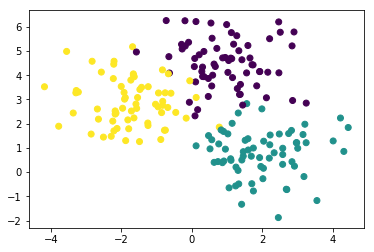

In [42]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

Wine data: 13 dim feature set, 1 2 3 class (y)

In [45]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.loc[:, 'Alcohol':] # Split off features

In [50]:
y.describe()

count    178.000000
mean       1.938202
std        0.775035
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Class, dtype: float64

In [51]:
X.head(3)

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


### 2 dim slice out of 13 dim data set

#### simple visualization, select two or three dimensions (humna intervention) and plot the data 

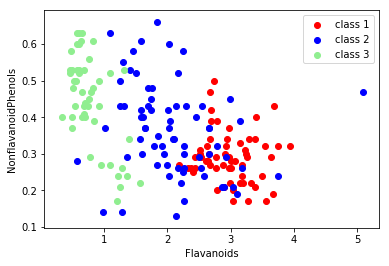

In [55]:
plt.scatter(X[y==1]['Flavanoids'], X[y==1]['NonflavanoidPhenols'], label = 'class 1', c = 'red')
plt.scatter(X[y==2]['Flavanoids'], X[y==2]['NonflavanoidPhenols'], label = 'class 2', c = 'blue')
plt.scatter(X[y==3]['Flavanoids'], X[y==3]['NonflavanoidPhenols'], label = 'class 3', c = 'lightgreen')

plt.legend()
plt.xlabel('Flavanoids')
plt.ylabel('NonflavanoidPhenols')

plt.show()

In [57]:
# Feature scaling
X_norm = (X-X.min())/(X.max()-X.min())

Principal Component Analysis(PCA) is a method of dimensionality reduction. It has applicagtion far beyond visualization, but it can also be applied here. It uses eigenvalues and eigenvectors to find new axes on which the data is most spread out. From these new axes, we can choose those with the most extreme spreading and project onto this plane.

In [58]:
pca = sklearnPCA(n_components=2) # 2 dim PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

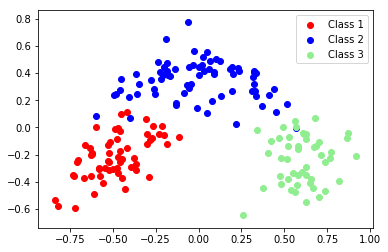

In [59]:
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

### Linear Discriminant Analysis (LDA)
A similar apporach to projecting to lower dimensions.
Although this is similar to PCA, but (at an ituitive level) attempts to separate the classes rather than just spread the entire dataset.

In [60]:
lda = LDA(n_components=2) # 2 dim LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X_norm, y))

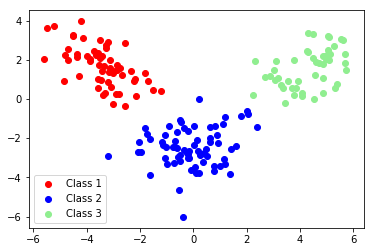

In [61]:
# Plot all three series
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

#### Parallel Coordinates
Instead of projecting the data into a two-dimensional plane and plotting the projections, the Parallel Coordinates plot(imported from pandas, instead of matplotlib) displays a vertical axis for each featrue you wish to plot. Each samples is then plotted as a color-coded line passing through the appropriate coordinate on each feature. While this doesn't always show how the data can be separated into classes, it does reveal trends within a particular class. 
###### For eample , we can see that Class 3

/home/snu/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


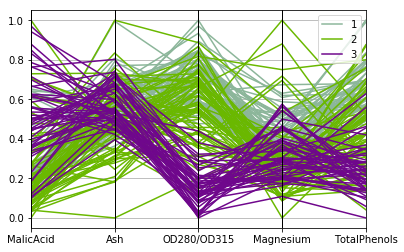

In [62]:
# Select features to include in the plot
plot_feat = ['MalicAcid', 'Ash', 'OD280/OD315', 'Magnesium','TotalPhenols']

# Concat classes with the normalized data
data_norm = pd.concat([X_norm[plot_feat], y], axis=1)

# Perform parallel coordinate plot
parallel_coordinates(data_norm, 'Class')
plt.show()